<h1> Quick introduction to gaussian mixture models with python </h1>
* With an example of fitting data to GMM <br>
* and making 3d gaussian examples < br>
From http://www.nehalemlabs.net/prototype/blog/2014/04/03/quick-introduction-to-gaussian-mixture-models-with-python/ and <br> http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [11]:
%matplotlib inline

In [12]:

from sklearn import mixture
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
import numpy as np


In [44]:
def q(x, y):
    # sigmax=1.0, sigmay=1.0, mux=0.0, muy=0.0, sigmaxy=0.0
    g1 = mlab.bivariate_normal(x,y,1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x,y,1.5, 0.8, 1, 2, 0.6)
    return g1, g2, 0.6 * g1 + 28.4 * g2 / (0.6 + 28.4)

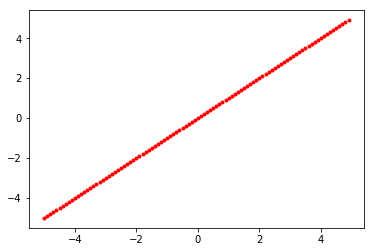

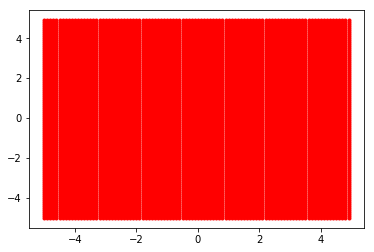

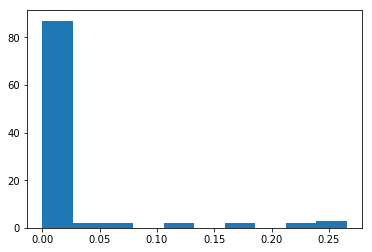

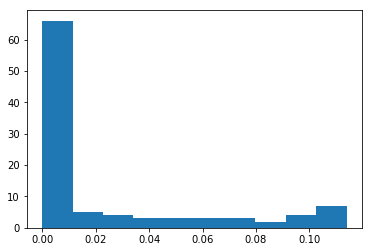

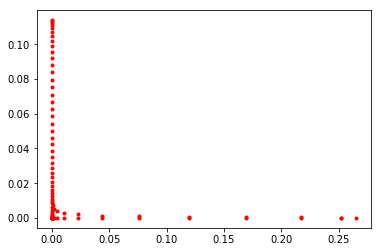

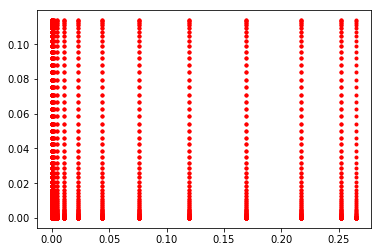

In [47]:
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
x, y, z = q(X,Y)

# Original X, Y
h, v = np.meshgrid(X,Y)
plt.plot(X, Y, marker='.', color='r', linestyle='none')
plt.show()
plt.plot(h, v, marker='.', color='r', linestyle='none')
plt.show()

# Show Bivariate x and y
plt.hist(x, 10) # First bivariate_normal
plt.show()
plt.hist(y, 10) # Second bivariate_normal
plt.show()

# Bivariate_norm x, y
h, v = np.meshgrid(x,y)
plt.plot(x, y, marker='.', color='r', linestyle='none')
plt.show()
plt.plot(h, v, marker='.', color='r', linestyle='none')
plt.show()

<h2> Making 3d gaussian

In [26]:
def plot_q():
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    X = np.arange(-5, 5, 0.1)
    Y = np.arange(-5, 5, 0.1)
    X, Y = np.meshgrid(X, Y)
    _, _, Z = q(X,Y)
    surf = ax.plot_surface(X, Y, Z, rstride =1, cstride=1, cmap = plt.get_cmap('coolwarm'),
                          linewidth = 0, antialiased = True)
    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

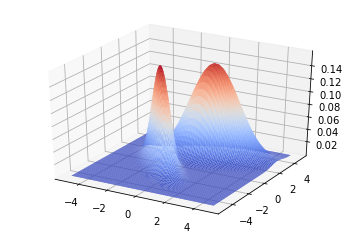

In [27]:
# After adding height, Z on x and y transformed by bivariate_norm
# two gaussian on 3d
plot_q()
plt.show()

<h2> An example of fitting data to GMM

In [18]:
def sample():
    "Metropolis Hastings"
    N = 10000
    s = 10
    r = np.zeros(2)
    p = q(r[0], r[1])
    print(p)
    samples = []
    for i in np.arange(N):
        rn = r + np.random.normal(size = 2)
        pn = q(rn[0], rn[1])
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn / p:
                p = pn
                r = rn
        if i % s == 0:
            samples.append(r)
    
    samples = np.array(samples)
    plt.scatter(samples[:,0], samples[:,1], alpha=0.5, s=1)
    
    dx = 0.01
    x = np.arange(np.min(samples), np.max(samples), dx)
    y = np.arange(np.min(samples), np.max(samples), dx)
    X, Y = np.meshgrid(x,y)
    Z = q(X,Y)
    CS = plt.contour(X, Y, Z, 10, alpha = 0.5)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.savefig("samples.png")
    return samples



0.006324536178176621


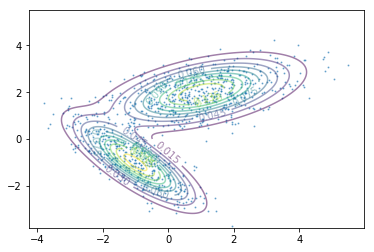

In [19]:
s = sample()

In [59]:
def fit_samples(samples):
    gmix = mixture.GaussianMixture(n_components = 2, covariance_type = 'full' )
    gmix.fit(samples)
    print (gmix.means_)
    colors = [i for i in gmix.predict(samples)]
    #print(colors)
    ax = plt.gca()
    ax.scatter(samples[:,0], samples[:,1], c=colors, alpha = 0.8)
    plt.show()



[[-1.10002958 -0.95219861]
 [ 0.9329987   1.93064744]]


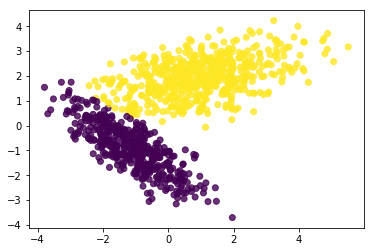

In [60]:
fit_samples(s)

